# Зависимость цен подержанных автомобилей от их характеристик


Проект выполняют: Агабалян Артём, Бондаренко Михаил, Гаврин Глеб.



Мы исследуем влияние характеристик подержанных автомобилей на цены их продажи.



Все данные были взяты с сайта kaggle.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import openpyxl


## Сбор данных 

In [46]:
df = pd.read_excel('Dataset.xlsx')

In [47]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,2024-04-23 00:00:00,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,2024-07-17 00:00:00,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,2024-01-16 00:00:00,1298.0,88.2,5.0


Мы обнаружили в датасете странный столбец mileage, по сути дублирующий столбец km_driven, и решили удалить его.

In [48]:
df.drop('mileage(km/ltr/kg)', axis=1, inplace=True)

В исходном датасете цена указывалась в рупиях. Переведём её в доллары.

In [49]:
df['selling_price'] = df['selling_price'].apply(lambda x: x * 0.011989)

In [50]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.2,5.0


## Описание данных

Датасет, который мы будем анализировать, выглядит так:

In [51]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,3836.480,110000,Petrol,Individual,Manual,First Owner,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,1618.515,119000,Diesel,Individual,Manual,Fourth & Above Owner,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,4579.798,120000,Diesel,Individual,Manual,First Owner,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,3476.810,25000,Diesel,Individual,Manual,First Owner,1396.0,70,5.0


**- name** - модель автомобиля


**- year** - год выпуска


**- km_driven** - пробег в км


**- fuel** - тип топлива


**- seller_type** - продавец(физическое лицо/автодилер)


**- transmission** - система(автомат/механика)


**- owner** - количество владельцев до последней продажи


**- engine** - объём двигателя


**- max_power** - количество лошадиных сил


**- seats** - количество посадочных мест

In [52]:
df.shape

(8128, 11)

### Обработка пропусков

Посмотрим на пропуски в данных:

In [53]:
df.isnull().mean()

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
engine           0.027190
max_power        0.026452
seats            0.027190
dtype: float64

Пропусков в данных мало, поэтому поработаем с ними в индивидуальном порядке.

Заметим, что в большинстве случаев у представленных машин 5 посадочных мест, поэтому пропуски в столбце seats мы решили заменить на моду, то есть 5.

In [54]:
df['seats'] = df['seats'].fillna(float(5))

В столбцах engine и max_power мы решили заменить пропуски на медианные значения. Так как пропусков мало, это не должно сильно исказить анализ.

В столбце max_power встретился пропуск типа ' ', заменим его на медиану

In [56]:
df.loc[df["max_power"] == " ", "max_power"] = 85

In [57]:
df['max_power'] = df['max_power'].fillna(df['max_power'].median())

In [59]:
df['max_power'] = df['max_power'].astype(float)

In [60]:
df['engine'] = df['engine'].fillna(df['engine'].median())

In [61]:
df.isnull().mean()

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
engine           0.0
max_power        0.0
seats            0.0
dtype: float64

Теперь пропусков нет

## EDA

Начнём с самого поверхностного анализа: посмотрим на графики зависимостей между признаками, целевой переменной.

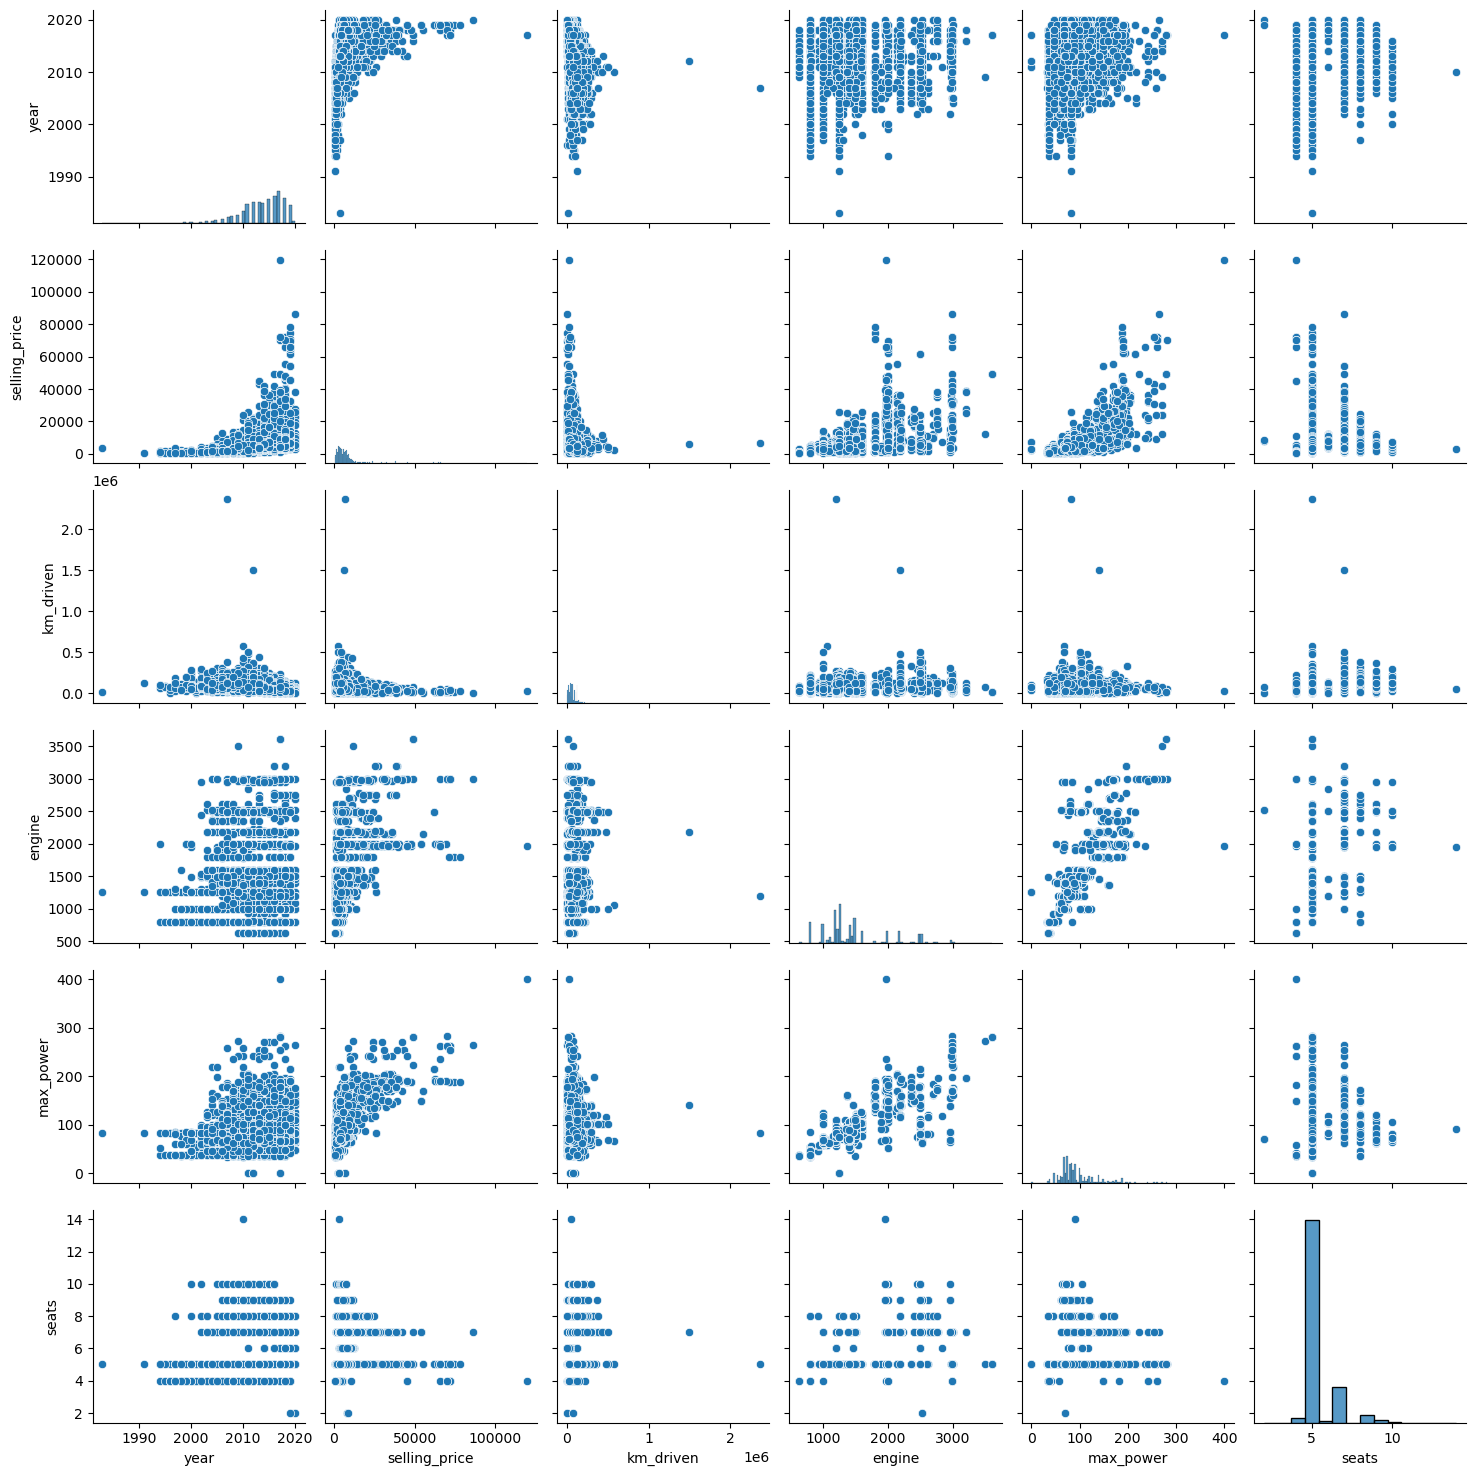

In [62]:
sns.pairplot(df)

Здесь каких-то значимых для анализа закономерностей выявить не удалось, поэтому мы решили детальнее изучить характеристики автомобилей.

### Выбросы

Построим ящики с усами, чтобы понять, есть ли у нас выбросы или наши данные однородны

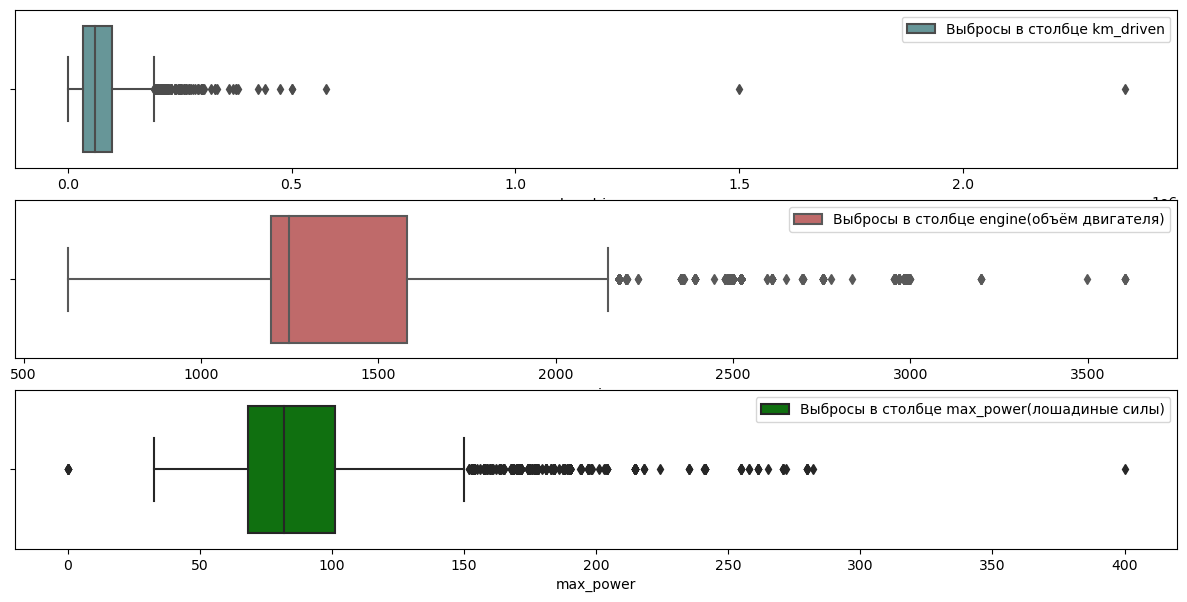

In [63]:
fig, axs = plt.subplots(3,1, figsize = (15, 7), sharey=True)
hist_1 = sns.boxplot(data=df, x="km_driven", color = 'cadetblue', ax = axs[0])
hist_1.legend(['Выбросы в столбце km_driven'])
hist_2 = sns.boxplot(data = df, x ="engine", color = "indianred",ax = axs[1])
hist_2.legend(['Выбросы в столбце engine(объём двигателя)'])
hist_3 = sns.boxplot(data = df, x ="max_power", color = "green",ax = axs[2])
hist_3.legend(['Выбросы в столбце max_power(лошадиные силы)'])
plt.show()

Заметим, что в данных заметны выбросы и ассимметрия(в max_power и km_driven).

Ассимметрия в km_driven объясняется тем, что это поддержанные автомобили и они редко продаются с маленьким пробегом.

Boxplot km_driven сильно сжат, это говорит, что в этих данных(пробег) небольшая дисперсия.

Избавимся от выбросов с помощью расчета **интерквартильного размаха**

In [64]:
q1_km = df['km_driven'].quantile(0.25)
q3_km = df['km_driven'].quantile(0.75)
IQR_km = q3_km - q1_km
low_km = q1_km - 1.5 * IQR_km
up_km = q3_km + 1.5 * IQR_km

df = df[(df['km_driven'] >= low_km) & (df['km_driven'] <= up_km)]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0


In [65]:
q1_engine = df['engine'].quantile(0.25)
q3_engine = df['engine'].quantile(0.75)
IQR_engine = q3_engine - q1_engine
low_engine = q1_engine - 1.5 * IQR_engine
up_engine = q3_engine + 1.5 * IQR_engine

df = df[(df['engine'] >= low_engine) & (df['engine'] <= up_engine)]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0


In [67]:
q1_power = df['max_power'].quantile(0.25)
q3_power = df['max_power'].quantile(0.75)
IQR_power = q3_power - q1_power
low_power = q1_power - 1.5 * IQR_power
up_power = q3_power + 1.5 * IQR_power

df = df[(df['max_power'] >= low_power) & (df['max_power'] <= up_power)]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0


In [68]:
df.shape

(6081, 11)

Построим те же boxplots уже с очищенными от выбросов данными

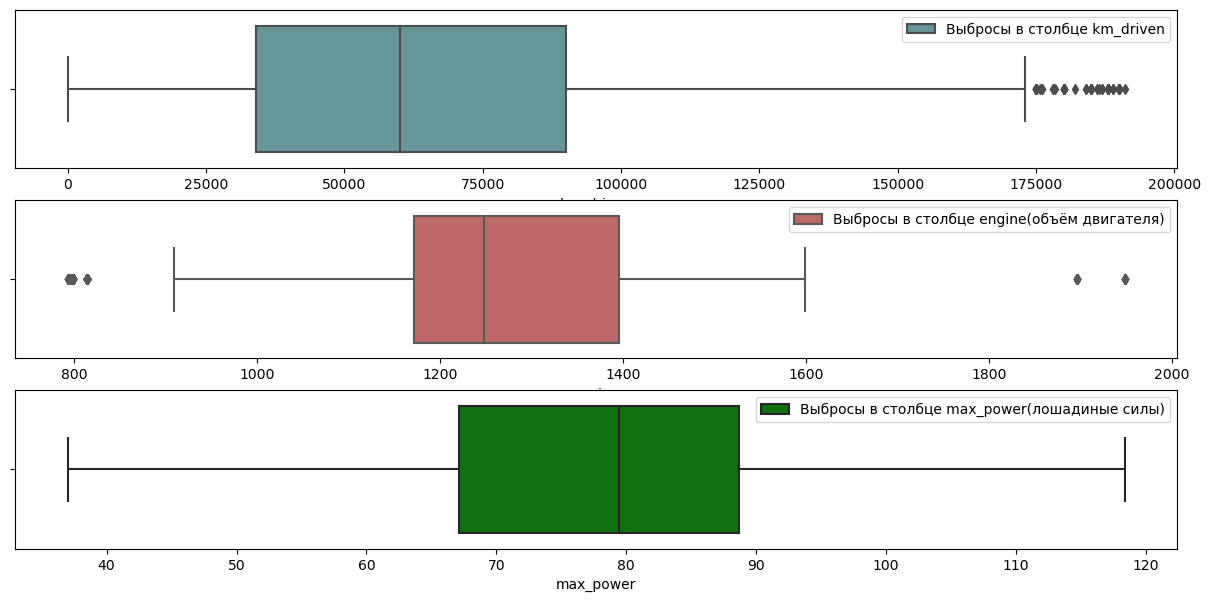

In [69]:
fig, axs = plt.subplots(3,1, figsize = (15, 7), sharey=True)
hist_1 = sns.boxplot(data=df, x="km_driven", color = 'cadetblue', ax = axs[0])
hist_1.legend(['Выбросы в столбце km_driven'])
hist_2 = sns.boxplot(data = df, x ="engine", color = "indianred",ax = axs[1])
hist_2.legend(['Выбросы в столбце engine(объём двигателя)'])
hist_3 = sns.boxplot(data = df, x ="max_power", color = "green",ax = axs[2])
hist_3.legend(['Выбросы в столбце max_power(лошадиные силы)'])
plt.show()

Метод интерквартильного размаха улучшил ситуацию. Теперь в данных меньше выбросов и они более симметричные.

### Категориальные признаки

Посмотрим на **виды топлива**, использующиеся в анализируемых машинах:

In [70]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

Кроме привычных Diesel и Petrol встречаются машины, на которых используется:

    
1) LPG - сжиженый газ(пропан-бутан). На такое топливо можно перевести любой автомобиль. Плюсами такого топлива являются экологичность и экономичность. Таким образом, автомобили с LPG должны стоить дороже.


2) CNG - компримированный природный газ. Он также дешевле бензина и экологичен.

Посмотрим, **кто продает машины**:

In [71]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

Продаются машины из предложенной выборки дилерами и частными лицами. При этом есть Trustmark dealers(Надёжные дилеры).

При этом если в целом сравнивать дилеров и частных лиц, то машины у дилеров будут стоить дороже, что логично:

In [72]:
df.loc[df['seller_type'] == 'Individual', 'selling_price'].mean()

4757.088672112749

In [73]:
df.loc[df['seller_type'] == 'Dealer', 'selling_price'].mean()

6700.537775696351

In [74]:
len(df[(df['seller_type'] == 'Individual')])

5224

In [75]:
len(df[(df['seller_type'] == 'Dealer')])

685

In [76]:
len(df[(df['seller_type'] == 'Trustmark Dealer')])

172

В данных по признаку продавца имеется дизбаланс, это стоит учитывать при анализе

Теперь посмотрим на пропорцию машин по признаку **механизма(механика/автомат)**

In [77]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [78]:
len(df[(df['transmission'] == 'Manual')])

5655

In [79]:
len(df[(df['transmission'] == 'Automatic')])

426

Машин с механикой в несколько раз больше.

Построим гистограммы распределения цены для машин с механикой и машин с автоматом:

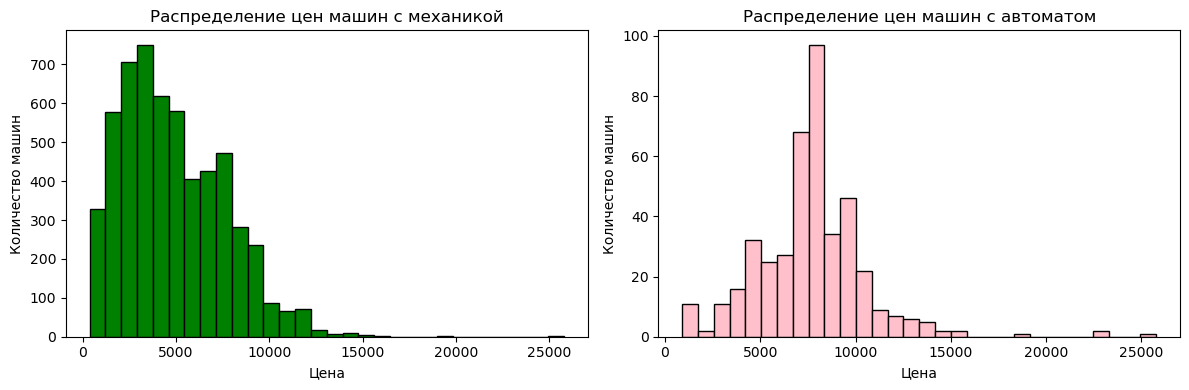

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
 
axes[0].hist(df[df['transmission']=='Manual']['selling_price'], bins=30, color='Green', edgecolor='black')
axes[0].set_title('Распределение цен машин с механикой')
 
axes[1].hist(df[df['transmission']=='Automatic']['selling_price'], bins=30, color='Pink', edgecolor='black')
axes[1].set_title('Распределение цен машин с автоматом')
 
for ax in axes:
    ax.set_xlabel('Цена')
    ax.set_ylabel('Количество машин')
 
plt.tight_layout()
plt.show()

По графикам можем сделать вывод, что машины с автоматом как правило обладают лучшими характеристиками и, соответственно, стоят дороже.

Теперь рассмотрим **количество владельцев машины до последней продажи**. Этот признак, как и **год выпуска**, должен сильно влиять на цену.

In [81]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

Посмотрим, через сколько владельцев проходили исследуемые машины:

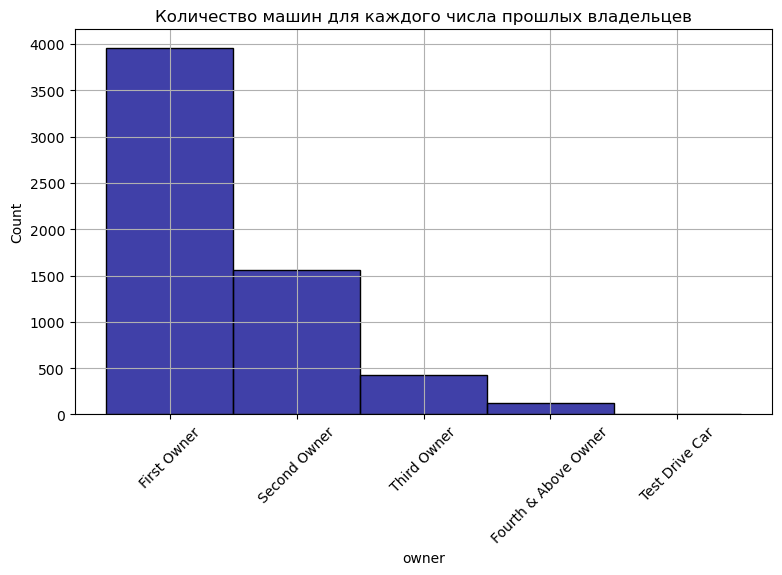

In [82]:
plt.figure(figsize=(9, 5))
df['owner'].value_counts()
sns.histplot(data = df, x = 'owner', color= 'darkblue')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Количество машин для каждого числа прошлых владельцев')
plt.show()

Абсолютное большинство машин побывали до последней продажи в руках одного или двух владельцев. Значит, год выпуска окажет большее влияние на цену.

Посмотрим также на распределение цен по кодичеству владельцев

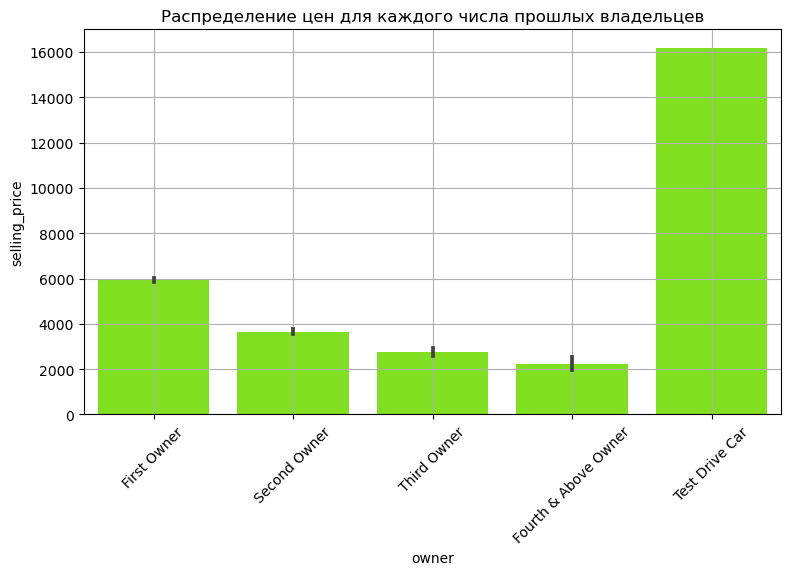

In [85]:
plt.figure(figsize=(9, 5))
df['owner'].value_counts()
sns.barplot(data = df, x = 'owner', y = 'selling_price', color = 'chartreuse')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Распределение цен для каждого числа прошлых владельцев')
plt.show()

Результат ожидаем. С добавлением каждого водителя цена уменьшается.

Мы решили, что 'возраст' машины легче интерпретировать, поэтому заменили год выпуска на 'возраст':

In [86]:
df['year'] = df['year'].apply(lambda x: 2024 - x)

In [87]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,10,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,10,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,18,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,14,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,17,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0


### Числовые признаки

Построим гистограммы распределения для основных числовых признаков:

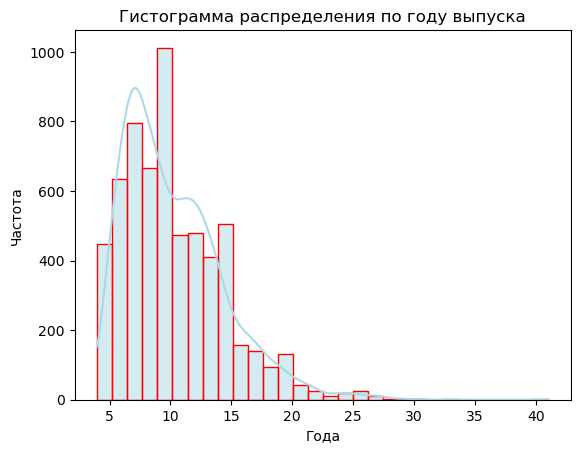

In [97]:
sns.histplot(df['year'], bins=30, kde=True, color='lightblue', edgecolor='red')
 

plt.xlabel('Года')
plt.ylabel('Частота')
plt.title('Гистограмма распределения по году выпуска')
 

plt.show()

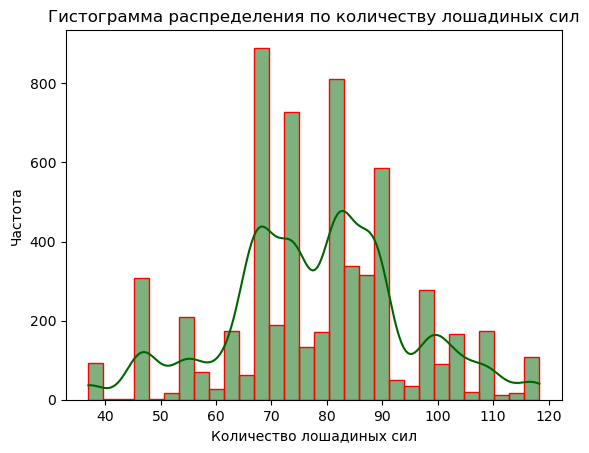

In [98]:
sns.histplot(df['max_power'], bins=30, kde=True, color='darkgreen', edgecolor='red')
 

plt.xlabel('Количество лошадиных сил')
plt.ylabel('Частота')
plt.title('Гистограмма распределения по количеству лошадиных сил')
 

plt.show()

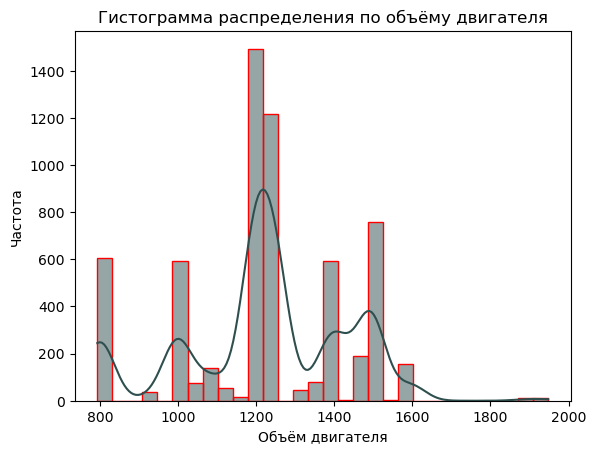

In [99]:
sns.histplot(df['engine'], bins=30, kde=True, color='darkslategrey', edgecolor='red')
 

plt.xlabel('Объём двигателя')
plt.ylabel('Частота')
plt.title('Гистограмма распределения по объёму двигателя')
 

plt.show()

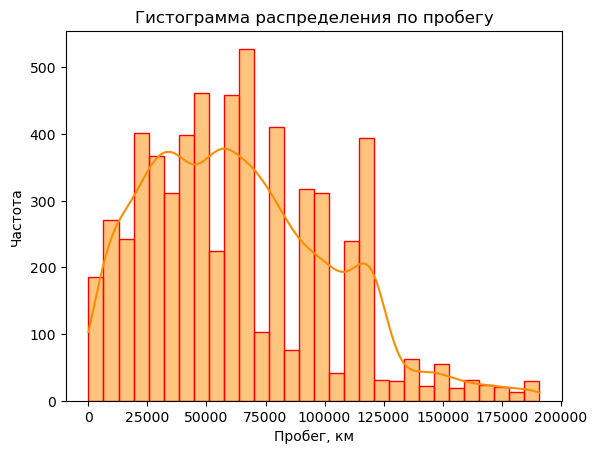

In [100]:
sns.histplot(df['km_driven'], bins=30, kde=True, color='darkorange', edgecolor='red')
 

plt.xlabel('Пробег, км')
plt.ylabel('Частота')
plt.title('Гистограмма распределения по пробегу')
 

plt.show()

### Корреляционный анализ

Построим таблицу корреляций:

In [89]:
df[['selling_price', 'km_driven', 'engine', 'max_power', 'seats', 'year']].corr()

,selling_price,km_driven,engine,max_power,seats,year
selling_price,1.000000,-0.382382,0.369302,0.560318,0.199717,-0.720797
km_driven,-0.382382,1.000000,0.201593,-0.024109,0.035575,0.485436
engine,0.369302,0.201593,1.000000,0.782070,0.222373,-0.079423
max_power,0.560318,-0.024109,0.782070,1.000000,0.192358,-0.268170
seats,0.199717,0.035575,0.222373,0.192358,1.000000,-0.144485
year,-0.720797,0.485436,-0.079423,-0.268170,-0.144485,1.000000


Теперь построим heatmap:

<Axes: >

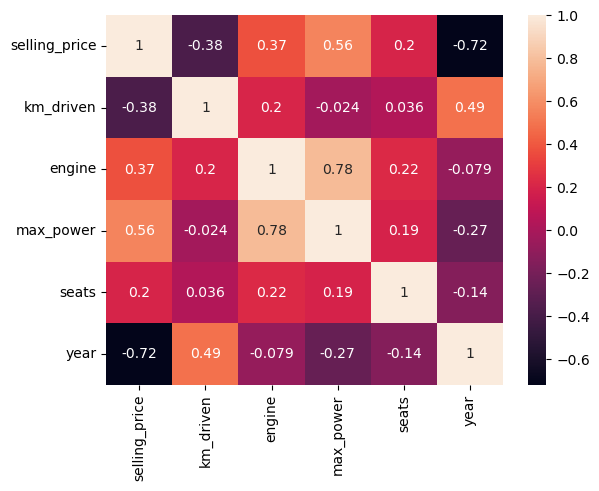

In [90]:
sns.heatmap(df[['selling_price', 'km_driven', 'engine', 'max_power', 'seats', 'year']].corr(), annot = True)

Наибольшее **влияние на цену** оказывают:

1) Возраст машины(высокая теснота связи)
2) Количество лошадиных сил(заметная взаимосвязь)
3) Объём двигателя и пробег (умеренная теснота связи)

Такие результаты ожидаемы. Чаще всего люди, покупающие подержанные машины, обращают в первую очередь внимание на их возраст, так как он влияет на то, сколько машина ещё проживёт. Поэтому возраст больше всего влияет на цену.

Построим на основе данных признаков графики **зависимости цены от них**

Начнём с зависимости **цены от возраста автомобиля**:

[Text(0.5, 1.0, 'Зависимость цен автомобилей от их возраста')]

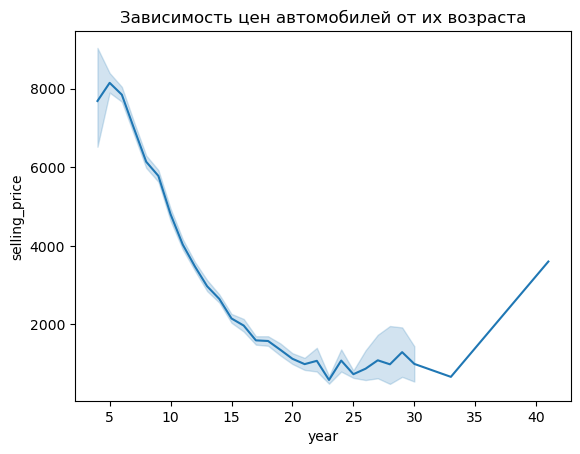

In [92]:
sns.lineplot(data=df, x='year', y='selling_price').set (title='Зависимость цен автомобилей от их возраста')

На участке, где содержится большинство рассматриваемых автомобилей(до 25 лет), тренд явно убывающий, причём зависимость похожа на квадратичную.

Теперь построим аналогичный график для **количества лошадиных сил**:

[Text(0.5, 1.0, 'Зависимость цен автомобилей от количества лошадиных сил')]

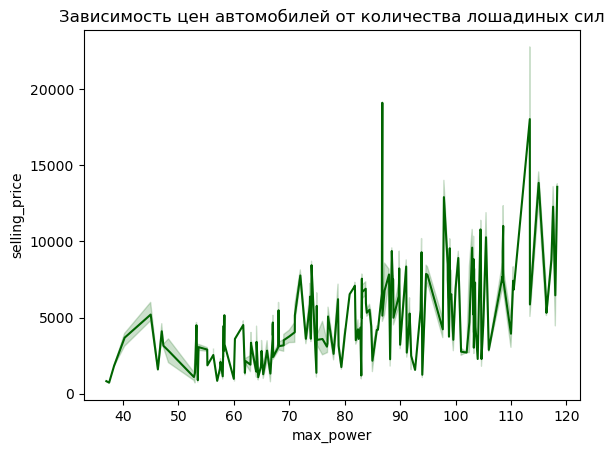

In [93]:
sns.lineplot(data=df, x='max_power', y='selling_price', color='darkgreen').set (title='Зависимость цен автомобилей от количества лошадиных сил')

Здесь заметен возрастающий тренд, но он не такой явный, так как если у одной машины больше лошадиных сил, но она, например, старше другой на 10 лет, то вторая будет стоить дороже.

Построим график для **пробега**:

[Text(0.5, 1.0, 'Зависимость цен автомобилей от пробега')]

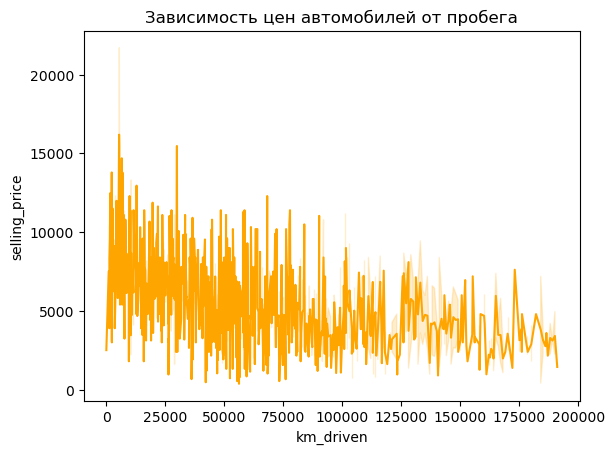

In [96]:
sns.lineplot(data=df, x='km_driven', y='selling_price', color='orange').set (title='Зависимость цен автомобилей от пробега')

Убывающий тренд заметен, причём видно, что большая часть автомобилей имеют пробег до 100000 км.

## Новые признаки

В процессе анализа датасета нам пришла идея классифицировать автомобили на автомобили масс-маркет и бюджетные.

Мы выбрали такую классификацию, так как в данном датасете нет дорогих, премиальных автомобилей. Мощность лучшей машины = 125 лошадиных сил.

Проанализировав рынок автомобилей, мы решили, что к масс-маркет условно относятся автомобили с количеством лошадиных сил >=100 и объёмом двигателя >=1400.

Создадим новый категориальный столбец:

In [101]:
df['Class'] = df.apply(lambda row: 'Mass market' if (row.engine >=1400 and row.max_power >=10) else 'Cheap' , axis = 1)
 
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,Class
0,Maruti Swift Dzire VDI,10,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0,Cheap
1,Skoda Rapid 1.5 TDI Ambition,10,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0,Mass market
2,Honda City 2017-2020 EXi,18,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0,Mass market
3,Hyundai i20 Sportz Diesel,14,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0,Cheap
4,Maruti Swift VXI BSIII,17,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0,Cheap


In [102]:
df.loc[df['Class'] == 'Cheap', 'selling_price'].mean()

4736.297236749019

In [103]:
df.loc[df['Class'] == 'Mass market', 'selling_price'].mean()

6237.56611118123

Рассчитав среднее для обоих категорий, видим, что цены между этими классами действительно сильно различаются.

## Планы по проверке гипотез

Будем считать, что цены автомобилей **независимы**. Также заметим, что у нас в наличии большое число наблюдений, следовательно, мы можем пользоваться тем, что среднее значение какого-либо признака будет распределено асимптотически нормально. Наконец, установим уровень значимости 0.05
 для каждой проверки.

**Гипотеза 1**: Автомобили на газовом топливе в  среднем стоят дороже на 10% и более.

**Гипотеза 2**: Цена автомобилей, которым от 5 до 20 лет, имеет квадратичную зависимосьть от возраста автомобиля.

**Гипотеза 3**: Самые современные автомобили (новее 2018 года включительно) имеют сравнимый или больший средний объем двигателя, чем автомобили старее.

## Планы по машинному обучению

Основная наша цель в блоке машинного обучения - построить модель, которая хорошо будет предсказывать **цену машины по её характеристикам.**

Скорее всего, это будет **линейная регрессия**.

Такая модель может быть полезна автодилерам, онлайн-сервисам по продаже автомобилей.